In [1]:
%matplotlib inline

import os 
import glob 
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
import time
import datetime
import matplotlib.pyplot as plt
from adjustText import adjust_text

import sys
sys.path.append('/home/ngr4/project/')
from scnd.scripts import data as scnddata
from scnd.scripts import dyn_goi_diffs as scnddyn


plt.rc('font', size = 8)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['legend.frameon']=False
sns.set_style("ticks")

In [2]:
# aesthetics 
# aesthetics
# aesthetics

cmap_timepoint = {v:sns.color_palette('BuGn')[1:][i] for i,v in enumerate(['5wk', '12wk', '18wk', '24wk', '30wk'])}

cmap_genotime = {}
for g in ['WT', 'SCA1']:
    if g=='WT':
        for i,v in enumerate(['5wk', '12wk', '18wk', '24wk', '30wk']):
            cmap_genotime['{}_{}'.format(g, v)] = sns.cubehelix_palette(5, start=.5, rot=-.75)[i]
    if g=='SCA1':
        for i,v in enumerate(['5wk', '12wk', '18wk', '24wk', '30wk']):
            cmap_genotime['{}_{}'.format(g, v)] = sns.cubehelix_palette(5)[i]
            
cmap_ctype={'Granule cell': '#FAC18A',
            'Unipolar brush cell': '#BA61BA',
            'Purkinje cell': '#EE5264',
            'GABAergic interneuron 1': '#F9EBAE',
            'GABAergic interneuron 2': '#88BB92',
            'GABAergic interneuron 3': '#46A928',
            'Astrocyte': '#F9AEAE',
            'Bergmann glia': '#AEB7F9',
            'Oligodendrocyte progenitor cell': '#F1815F',
            'Oligodendrocyte': '#75A3B7',
            'Microglia': '#AC5861',
            'Pericyte': '#2D284B',
            'Endothelial cell': '#1C67EE',
            'Deep cerebellar nuclei': '#aaaaaa'}

cmap_genotype={'WT':'#010101',
               'SCA1':'#ffd478'}



In [3]:
pfp = '/home/ngr4/project/scnd/results'

In [4]:
wt, mut = scnddata.load_mouse_imputed_revision(add_md=scnddata.load_md())

In [5]:
wt

AnnData object with n_obs × n_vars = 164722 × 26374
    obs: 'batch', 'genotype', 'timepoint', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pmito', 'n_genes', 'louvain', 'res_sca1', 'ees_sca1', 'stored_ctype', 'ctype', 'value', 'ctype_ubcupdate'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_phate', 'X_umap'
    varm: 'PCs'
    layers: 'imputed'
    obsp: 'connectivities', 'distances'

In [6]:
goi = {k:['Gm39465'] for k in np.sort(wt.obs.ctype_ubcupdate.unique())}
del goi['Granule cell']

In [7]:

# goi = {
#     'Oligodendrocyte':['Plp1'],
#     'Purkinje cell':['Paxbp1',],
#     'Deep cerebellar nuclei':['Sdk1'],
#     'Endothelial cell':['Igfbp5']
# }

recalculate = True

# aggregate imputed data and pseudotime
X = pd.DataFrame()
for ii, ctype in enumerate(goi.keys()):

    print('\nStarting {}'.format(ctype))
    print('----\n')
    tic = time.time()
    
    wtt = wt[wt.obs['ctype_ubcupdate']==ctype, :].copy()
    mutt = mut[mut.obs['ctype_ubcupdate']==ctype, :].copy()
    
    X_wt, t_wt = scnddyn.meld_pseudotime(wtt, goi[ctype])
    X_wt['genotype'] = wtt.obs['genotype'].to_list()
    X_wt['timepoint'] = wtt.obs['timepoint'].to_list()
    X_wt['Pseudotime'] = t_wt
    del t_wt
    X_wt['ctype'] = wtt.obs['ctype_ubcupdate'].to_list()
    
    X_mut, t_mut = scnddyn.meld_pseudotime(mutt, goi[ctype])
    X_mut['genotype'] = mutt.obs['genotype'].to_list()
    X_mut['timepoint'] = mutt.obs['timepoint'].to_list()
    X_mut['Pseudotime'] = t_mut
    del t_mut
    X_mut['ctype'] = mutt.obs['ctype_ubcupdate'].to_list()


    # store in X of interest
    X = X.append(X_wt.append(X_mut))

    print('  done in {}-s'.format(time.time() - tic))
    


Starting Astrocyte
----



computing PCA
    with n_comps=50
    finished (0:00:49)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:04)
computing PCA
    with n_comps=50
    finished (0:00:48)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)


  done in 106.78070878982544-s

Starting Bergmann glia
----



computing PCA
    with n_comps=50
    finished (0:00:47)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:50)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)


  done in 105.6792483329773-s

Starting Deep cerebellar nuclei
----



computing PCA
    with n_comps=50
    finished (0:00:24)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:04)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)


  done in 31.176464557647705-s

Starting Endothelial cell
----



computing PCA
    with n_comps=50
    finished (0:00:08)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:10)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)


  done in 21.453346967697144-s

Starting GABAergic interneuron 1
----



computing PCA
    with n_comps=50
    finished (0:01:06)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:01)
computing PCA
    with n_comps=50
    finished (0:01:04)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:01)


  done in 143.19082498550415-s

Starting GABAergic interneuron 2
----



computing PCA
    with n_comps=50
    finished (0:00:19)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:13)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)


  done in 35.915125608444214-s

Starting GABAergic interneuron 3
----



computing PCA
    with n_comps=50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)


  done in 7.422158241271973-s

Starting Microglia
----



computing PCA
    with n_comps=50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)


  done in 6.007803201675415-s

Starting Oligodendrocyte
----



computing PCA
    with n_comps=50
    finished (0:00:47)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:46)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)


  done in 101.2451241016388-s

Starting Oligodendrocyte progenitor cell
----



computing PCA
    with n_comps=50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)


  done in 6.508596420288086-s

Starting Pericyte
----



computing PCA
    with n_comps=50
    finished (0:00:05)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:05)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)


  done in 12.003126621246338-s

Starting Purkinje cell
----



computing PCA
    with n_comps=50
    finished (0:00:17)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:08)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)


  done in 28.11955690383911-s

Starting Unipolar brush cell
----



computing PCA
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)


  done in 3.128136157989502-s


In [8]:
x = X.melt(
    id_vars=['genotype','timepoint','ctype','Pseudotime'],
    value_vars=[i for glist in goi.values() for i in glist],
    var_name='Gene',
    value_name='Expression')
x = x.dropna()

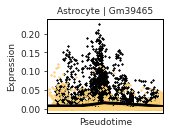

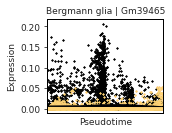

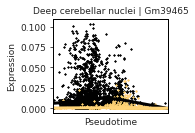

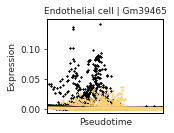

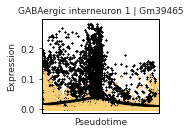

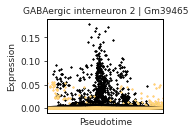

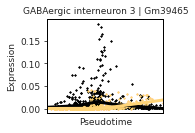

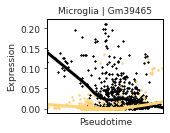

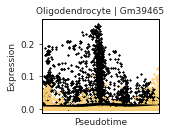

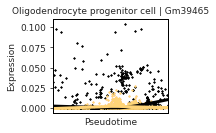

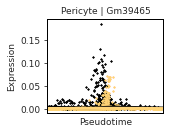

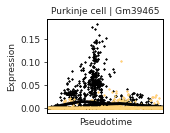

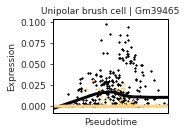

In [9]:


for i in goi.keys():
    x_i = x.loc[(x['ctype']==i) & x['Gene'].isin(goi[i]), :]

    p = sns.lmplot(
        x='Pseudotime',
        y='Expression',
        data=x_i,
        hue='genotype',
        col='Gene',
        palette=cmap_genotype,
        col_wrap=4,
        height=2,
        aspect=1,
        markers='o',
        sharex=False,
        sharey=False,
        hue_order=None,
        col_order=goi[i],
        legend=False,
        legend_out=True,
        x_estimator=None,
        x_bins=None,
        x_ci='ci',
        scatter=True,
        fit_reg=True,
        ci=None,
        n_boot=100,
        units=None,
        seed=None,
        order=1,
        logistic=False,
        lowess=True,
        robust=False,
        logx=False,
        x_partial=None,
        y_partial=None,
        truncate=True,
        x_jitter=None,
        y_jitter=None,
        scatter_kws={'s':0.5,'alpha':0.33,'rasterized':True},
        line_kws={'linewidth':3},
        size=None,
    )
    p.set_titles(row_template = '{row_name}', col_template = i+' | {col_name}')
    p.set(xticks=[])
    for ax in p.axes.flatten(): # Loop directly on the flattened axes 
        for _, spine in ax.spines.items():
            spine.set_visible(True) # You have to first turn them on
            spine.set_color('black')
            spine.set_linewidth(1)

    p.savefig(os.path.join(pfp,'dyn_Gm39465_revision_{}.pdf'.format(i)),bbox_inches='tight',dpi=600)